In [1]:
# импортируем нумпай (или нампай), он очень удобен для математических вещей
import numpy as np

$$
    \begin{aligned}
        &G(x, \omega) = x + \xi(\omega), \xi \sim R(-0.75, 0.75) \\
        &f(x) = \frac{-2 + |\sin{16x}|}{x^2 + 1} \\
        &P(\Delta, T^{[k]}) = e^{-\frac{\Delta}{T^{[k]}}}
    \end{aligned}
$$

In [2]:
# новое потенциальное приближение для x
def G(x):
    return x + np.random.uniform(-0.75, 0.75)

# целевая функция
def f(x):
    return (-2 + np.abs(np.sin(16 * x))) / (x**2 + 1)

# вероятность изменить приближение на потенциальное, если потенциальное хуже старого
def P(delta, T):
    return np.exp(- delta / T)

In [3]:
# реализуем алгоритм
def SA(T_0, x_0, alpha): # настраиваемые параметры лучше поместить в параметры функции метода
    T_k = T_0 # начальная температура - чаще всего 100
    x_k = [x_0] # для хранения всех приближений удобно использовать список Python, который мы вернем из функции
    f_k = [f(x_0)] # значения f(x) также будем хранить в списке, начальные данные уже добавлены 
    while T_k > 1e-05: # критерий остановки, удобно здесь использовать именно температуру (она же снижается)
        x_k_tilde = G(x_k[-1]) # ищем случайное потенциальное приближение, элемент с индексом -1 последний 
                               # текущий элемент списка
        delta = f(x_k_tilde) - f_k[-1] # вычисляем разницу
        if delta < 0: # новое приближение оказалось лучше
            x_k += [x_k_tilde] # сразу добавляем его в список, оно станет текущим
        else: # а если случайное приближение хуже ?
            if np.random.uniform(0, 1) < P(delta, T_k): # случайная величина равн. распр., чем выше температура, тем P выше
                x_k += [x_k_tilde] # принимаем неоптимальное решение, мы в этот момент скорее всего молоды
            else:
                x_k += [x_k[-1]] # а иначе ничего не меняем, раз нам так оптимальнее
        f_k += [f(x_k[-1])] # высчитываем текущее значение с текущим приближением
        T_k = alpha * T_k # и уменьшаем температуру, она довольно быстро становится низкой, поэтому стоит брать alpha > 0.9
         
    print(x_k[-1], f_k[-1], len(x_k)) # выводим результат для удобства
    return x_k, f_k # из функции возвращаем списки из приближений и значений целевой функции, для отображения результатов

In [8]:
x_k, f_k = SA(100, 5, 0.95) # придется запускать несколько раз, либо менять параметры, гарантии сходимости не даны
                            # приближенно найден глобальный минимум, это здорово

-0.00010627060127044174 -1.998299648631304 316


In [9]:
# с помощью этой прекрасной библиотеки мы отображаем результаты работы 
import matplotlib.pyplot as plt
# import tikzplotlib

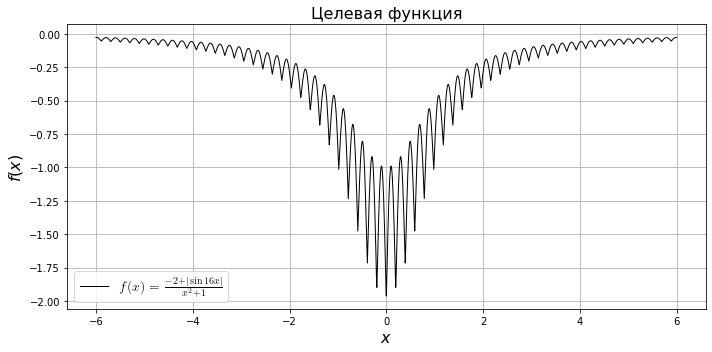

In [10]:
# сначала отобразим график самой целевой функции
fig, ax = plt.subplots(tight_layout = True, figsize=(10, 5))

ax.set_title('Целевая функция', fontsize = 16)

plt.rcParams['text.usetex'] = True

ax.set_ylabel(r'$f(x)$', fontsize = 16)
ax.set_xlabel(r'$x$', fontsize = 16)

x = np.linspace(-6, 6, 2500)

ax.plot(x, f(x), color = 'black', linewidth = 1, label = r'$f(x) = \frac{-2 + |\sin{16x}|}{x^2 + 1}$')

ax.legend(fontsize = 14)
ax.grid()

plt.rcParams['text.usetex'] = False

plt.show()
# tikzplotlib.save("SA_min_1.tex", flavor="context")

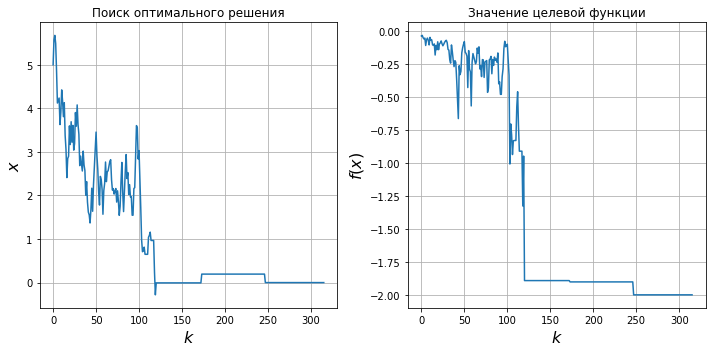

In [11]:
# затем посмотрим на работу алгоритма, не зря мы сохранили те списки, здесь они пригодятся
fig, axes = plt.subplots(nrows = 1, ncols = 2, tight_layout = True, figsize=(10, 5))

axes[0].set(title='Поиск оптимального решения')
axes[1].set(title='Значение целевой функции')

plt.rcParams['text.usetex'] = True

axes[0].set_ylabel(r'$x$', fontsize = 16)
axes[0].set_xlabel(r'$k$', fontsize = 16)
axes[1].set_ylabel(r'$f(x)$', fontsize = 16)
axes[1].set_xlabel(r'$k$', fontsize = 16)

k = np.arange(0, len(x_k), 1)
axes[0].plot(k, x_k)
axes[1].plot(k, f_k)

axes[0].grid()
axes[1].grid()

plt.rcParams['text.usetex'] = False

plt.show()
#tikzplotlib.save("SA_min_2.tex", flavor="context")

In [12]:
%matplotlib notebook

In [13]:
# куда же без анимации? рисуем поиск минимума
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


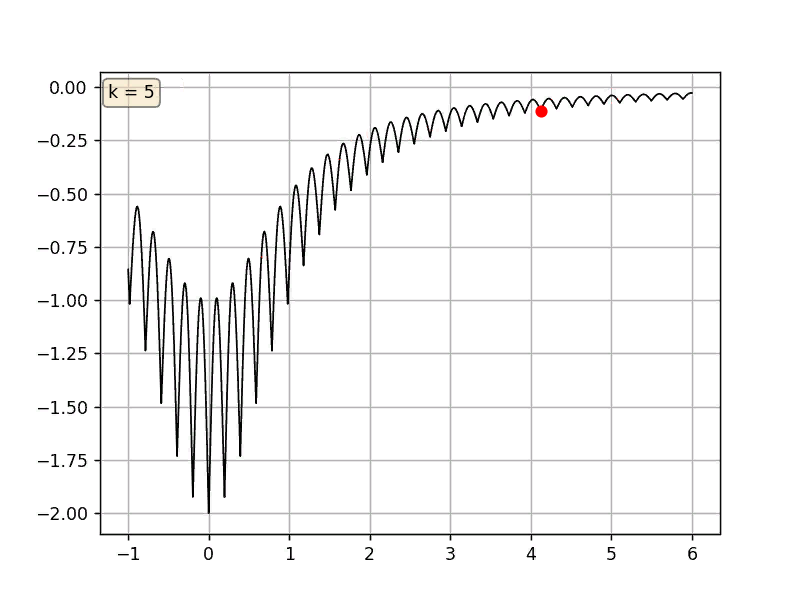

In [14]:
# именно так
fig, ax = plt.subplots()

t = np.arange(-1, 6, 1e-4)
l, = ax.plot(t, f(t), color = 'black', linewidth = 1)

redDot, = ax.plot([5], [f(5)], 'ro')
title = ax.text(-1.25, -0.05, "", bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

def animate(i):
    title.set_text(f'k = {i}')
    redDot.set_data(x_k[i], f_k[i])
    return redDot, title,

ax.grid()

# create animation using the animate() function
myAnimation = FuncAnimation(fig, animate, frames=len(x_k), \
                                      interval=10, blit=True, repeat=True)
plt.show()

In [15]:
#!brew install imagemagick

# myAnimation.save('animation.gif', writer='imagemagick', fps=60)